# Homework w08d01 - Bayesian Statistics

In these exercises, we are going to make use of Bayes rule
$$\pi(\theta| x)=\frac{\pi(x |\theta)\pi(\theta)}{\sum_\theta \pi(x |\theta)\pi(\theta)}\ .$$

In [1]:
import numpy as np
from scipy import misc, special

#### 1. Imagine you have a box containing three coins. Two of these coins are fair (equal probability for head and tail), but one is biased (probability for head is 0.2). Now you draw a coin from the box and toss it three times. If two heads and one tail are obtained (in no particular order), what is the probability that the coin was fair, and what is the probability that the coin was biased?

We have to calculate
$$\pi(F|x)=\frac{\pi(x|F)\pi(F)}{\pi(x|F)\pi(F)+\pi(x|B)\pi(B)} 
= \frac{3\left(\frac{1}{2}\right)^3 \frac{2}{3}}
{3\left(\frac{1}{2}\right)^3 \frac{2}{3}+
3\left(\frac{1}{5}\right)^2\frac{4}{5} \frac{1}{3}}=\frac{125}{141}\approx 0.8865$$

In [2]:
fair = 3*0.5**3*2/3./float(3*0.5**3*2/3.+3*0.2**2*0.8/3)
biased = 1-fair
print "fair: ", fair, ", biased: ", biased

fair:  0.886524822695 , biased:  0.113475177305


#### 2. The random variable X has a Poisson distribution with an unknown parameter $\lambda$ with the subjective prior probility function given in the table. A random sample of size 3 yields the X-values 2, 0, and 3. Find the posterior distribution of $\lambda$.

|$\lambda$|0.5|1.0|1.5|
|---|---|---|---|
|$\pi\left(\lambda        \right)$      |1/2|1/3|1/6|

Hints: 

The Poisson distribution of a discrete random variable X is given by $P(X=x)=\frac{\lambda^x}{x!} \exp(-\lambda)$. The likelihood function is given by the product of the probabilities for the three observed x-values given a particular $\lambda$.

You can use the function misc.factorial from the scipy package to calculate the factorial.

$$\pi(\lambda|x) = \frac{\frac{\lambda^{x_1+x_2+x_3}e^{-3\lambda}}{x_1! x_2!x_3!}\pi(\lambda)}
{\sum_{\lambda}\frac{\lambda^{x_1+x_2+x_3}e^{-3\lambda}}{x_1! x_2!x_3!}\pi(\lambda)}
= \frac{\lambda^5e^{-3\lambda}\pi(\lambda)}{\sum_{\lambda}\lambda^5 e^{-3\lambda}\pi(\lambda)}$$

In [3]:
x = np.array([2,0,3])
lam = np.array([0.5,1.0,1.5])
prior = np.array([0.5,1/3.,1/6.])
for i in range(len(prior)):
    a = np.exp(-3*lam[i])*lam[i]**(x.sum())*prior[i]/float(np.prod(misc.factorial(x)))
    b = 1/float(np.prod(misc.factorial(x)))*np.sum(np.exp(-3*lam)*lam**(np.sum(x))*prior)
    print a/b

0.102115187224
0.48607953235
0.411805280426


#### 3. In a lot of 100 lightbulbs produced by a machine, an unknown number $\rho$ are defective. Assume that $\rho$ has a prior binomial distribution with parameter $p=0.1$. Find the posterior distribution of $\rho$ if a bolt chosen at random from the lot is a) defective; b) not defective.

Hint: 

The binomial distribution for a discrete random variable X is given by $P(X=x)=\binom{n}{x} p^x (1-p)^{n-x}$. 

You can assume a uniform likelihood function of the form $\frac{\rho}{n}$.

You can use the scipy function special.binom(n,k) to calculate the binomial coefficient.

$$\pi(\rho|n)=\binom{n}{\rho} p^{\,\rho} (1-p)^{n-\rho}\frac{\rho}{n}\times 
\left(\sum_{\rho=0}^n\binom{n}{\rho} p^{\,\rho} (1-p)^{n-\rho}\frac{\rho}{n}\right)^{-1}$$
for $0<\rho<n$

In [4]:
n = 100
rho = np.arange(n+1)
p = 0.1
prior = special.binom(n,rho)*p**rho*(1-p)**(n-rho)
ll = rho/float(n)
posterior_def = ll*prior/np.sum(prior*ll)
posterior_nondef = (1-ll)*prior/np.sum(prior*(1-ll))

In [5]:
np.sum(posterior_def), np.sum(posterior_nondef)

(0.99999999999999989, 0.99999999999999978)

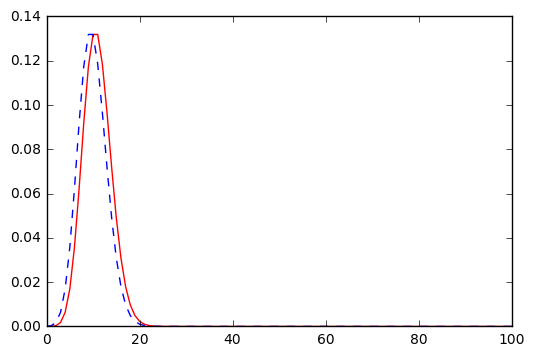

In [6]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(rho,posterior_def,'r',rho,posterior_nondef,'b--')
plt.show()

In [7]:
posterior_def[:10]

array([  0.00000000e+00,   2.95126654e-05,   3.24639320e-04,
         1.76748074e-03,   6.34983822e-03,   1.69329019e-02,
         3.57472374e-02,   6.22266725e-02,   9.18584212e-02,
         1.17374649e-01])

In [8]:
posterior_nondef[:10]

array([  2.95126654e-05,   3.24639320e-04,   1.76748074e-03,
         6.34983822e-03,   1.69329019e-02,   3.57472374e-02,
         6.22266725e-02,   9.18584212e-02,   1.17374649e-01,
         1.31865347e-01])